In [1]:
from epics import caget
import time

In [8]:
n_shots = 10
pv = "AWAVXI11ICT:Ch1"
start_time = time.time()
charge_vals = []
for i in range(n_shots):
    charge_vals += [caget(pv)]
    time.sleep(0.6)
    if i % 10 == 0:
        print(f"{i}: {time.time() - start_time} s")
        start_time = time.time()
        

0: 0.6014857292175293 s


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([7.69374555e-09, 7.77489155e-09, 7.85603755e-09, 7.93718354e-09,
        8.01832954e-09, 8.09947554e-09, 8.18062154e-09, 8.26176754e-09,
        8.34291354e-09, 8.42405954e-09, 8.50520553e-09, 8.58635153e-09,
        8.66749753e-09, 8.74864353e-09, 8.82978953e-09, 8.91093553e-09,
        8.99208153e-09, 9.07322752e-09, 9.15437352e-09, 9.23551952e-09,
        9.31666552e-09, 9.39781152e-09, 9.47895752e-09, 9.56010352e-09,
        9.64124951e-09, 9.72239551e-09, 9.80354151e-09, 9.88468751e-09,
        9.96583351e-09, 1.00469795e-08, 1.01281255e-08, 1.02092715e-08,
        1.02904175e-08, 1.03715635e-08, 1.04527095e-08, 1.05338555e-08,
        1.06150015e-08, 1.06961475e-08, 1.07772935e-08, 1.08584395e-08,
        1.09395855e-08, 1.10207315e-08, 1.11018775e-08

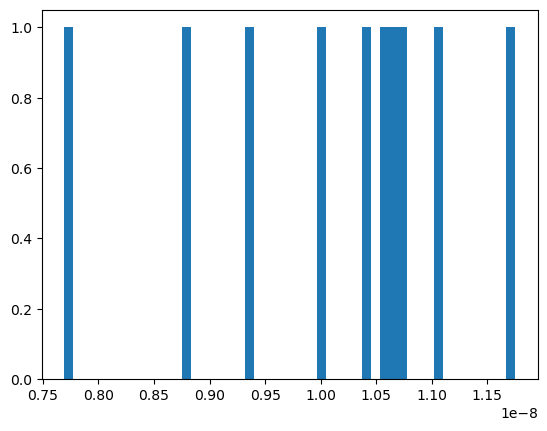

In [9]:
import numpy as np
import matplotlib.pyplot as plt
data = np.array(charge_vals)
plt.hist(data, bins=50)

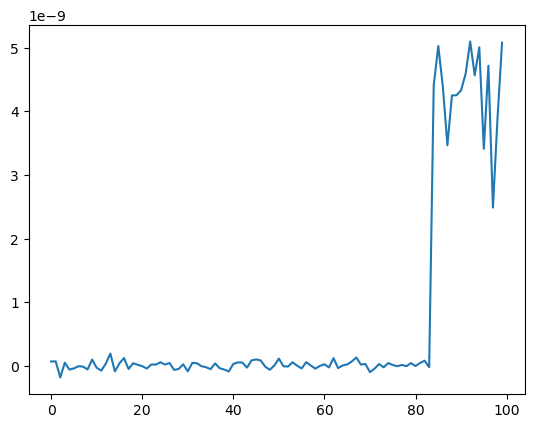

In [4]:
plt.plot(data)

In [5]:
np.mean(data)

7.02460916827783e-10

In [6]:
np.std(data)

1.5995307916576989e-09

nan


/home/awa/miniconda3/envs/awa-badger/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/awa/miniconda3/envs/awa-badger/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/awa/miniconda3/envs/awa-badger/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


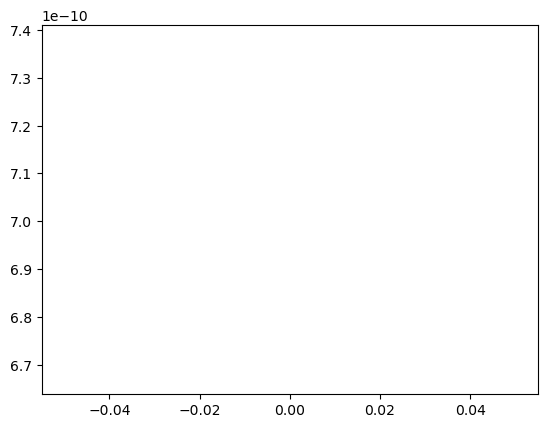

In [7]:
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

m = moving_average(data, 100)
print(np.std(data[400:]))
plt.plot(m)